Slope (m): 37.938795808430136
Intercept (c): 3904.1359518505005


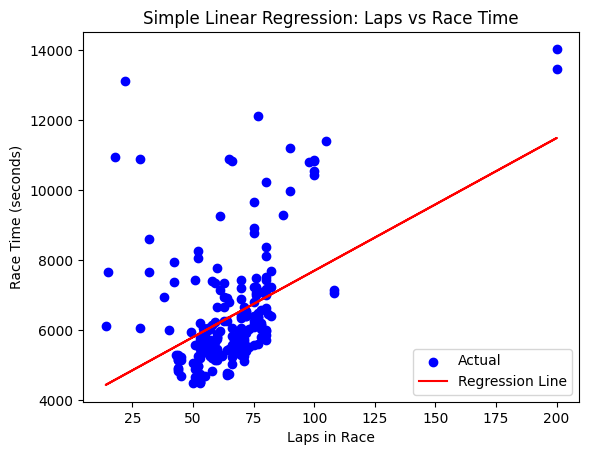

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load dataset
data = pd.read_csv("winners_f1_1950_2025_v2.csv")

# Convert race time (HH:MM:SS) to total seconds
def time_to_seconds(t):
    try:
        parts = list(map(int, t.split(":")))
        return parts[0] * 3600 + parts[1] * 60 + parts[2]
    except:
        return np.nan

# Apply conversion
data["time_seconds"] = data["time"].apply(time_to_seconds)

# Drop rows with missing values
data = data.dropna(subset=["time_seconds", "laps"])

# -----------------------------
# Simple Linear Regression: laps vs race time
# -----------------------------
X = data[["laps"]]   # Independent variable
y = data["time_seconds"]   # Dependent variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Print coefficients
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

# Plot actual vs predicted
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Laps in Race')
plt.ylabel('Race Time (seconds)')
plt.title('Simple Linear Regression: Laps vs Race Time')
plt.legend()
plt.show()